<center><img src="img/skillfactorylogo.png"></center>

<h1><center>Курс "Практический Machine Learning"</center></h1>
<h3><center>Шестаков Андрей</center></h3>
<hr>
<h2><center>Повторение метрик качества</center></h2>
<h2><center>Метрические методы, KNN</center></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

from ipywidgets import interact, IntSlider, FloatSlider

# Небольшое повторение

## Обобщающая способность алгоритма

* Можно построить алгоритм с идеальным качеством на обучающей выборке
* Profit???
* Nope...
* Важно понимать, насколько хорошо работает алгоритм на объектах, которые он ранее не видел


* Недообучение (underfitting) – модель сильно упростила искомую зависимость
* Переобучение (overfitting) – модель подогналась даже под шум в данных

<center><img src='img/overfit.png' width=900></center>

## Оценка обобщающей способности

<center><img src='img/cv.png' width=900></center>

# Меры качества классификации

## Меры качества классификации

* Как правило, классификаторы выдают не просто предсказанную метку класса, но и степень уверенности в ней
* Основные меры качества
    * Accuracy
    * Precision, Recall, F-measure
    * ROC-AUC, PR-AUC Gini-index, Model-lift
    * Log-loss

## Матрица перемешивания

Матрица перемешивания $M=\{m_{ij}\}_{i,j=1}^{C}$ показывает количество объектов класса $с_{i}$, которые были отнесены классификатором к классу $с_{j}$.

<center><img src='img/confusion.jpg'><center/>

## Матрица перемешивания (2 класса)


<center><img src='img/binary_conf.png'></center>
* TP (true positive) - Верное предсказание (+1)
* FP (false positive) - Ошибка первого рода (ложная тревога)
* FN (false negative) - Ошибка второго рода (пропуск цели)
* TN (true negative) - Верное предсказание (-1)
* Pos (Neg) - Общее количество +1 и -1

## Меры на основе матрицы перемешивания

<center><img src='img/binary_conf.png'></center>


* $ \text{accuracy} = \frac{TP + TN}{Pos+Neg}$
* $ \text{error rate} = 1 -\text{accuracy}$
* $ \text{recall} =\frac{TP}{TP + FN} = \frac{TP}{Pos}$ - (полнота)
* $ \text{precision} =\frac{TP}{TP + FP}$ - (точность)
* $ \text{F}_\beta \text{-score} = (1 + \beta^2) \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{(\beta^2 \cdot \mathrm{precision}) + \mathrm{recall}}$
    * почему не среднее или максимум?


* Можно ли посчитать эти меры для многоклассовой классификации?

In [2]:
from mpl_toolkits.mplot3d import Axes3D


def demo_fscore(beta=1):
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    prec = np.linspace(0, 1, 100)
    rec = np.linspace(0, 1, 100)
    
    P, R = np.meshgrid(prec, rec)
    
    F = (1 + beta**2) * (P*R)/((beta**2 * P) + R)
    
    surf = ax.plot_surface(P, R, F, cmap=plt.cm.coolwarm, alpha=0.3,
                               linewidth=0, antialiased=False)

    ax.set_zlim(-0.01, 1.01)
    
    ax.view_init(30,200)
    ax.set_xlabel('precision')
    ax.set_ylabel('recall')
    ax.set_zlabel('F-score')
    ax.set_title('beta = %.2f'%beta)

    fig.colorbar(surf)
    plt.show()
    
   

In [3]:
fig = interact(demo_fscore, beta=FloatSlider(min=0.1, max=5, step=0.3, value=1))

interactive(children=(FloatSlider(value=1.0, description='beta', max=5.0, min=0.1, step=0.3), Output()), _dom_…

## Меры качества на основе уверенности классификатора

## ROC кривая

* Выбор порога классификации - отдельная большая задача
* Можно ли как-то обойтись без него и сравнить неколько моделей?


* ROC кривая - показывает зависимость между TPR (верным предсказанием) и FPR (ложным срабатыванием)
<center><img src='img/roc.png' width=400></center>


## ROC кривая

* Классификатор $a(x)$ возвращает степень принадлежности к классу "+1" - score(x).
* Упорядочим объекты по убыванию score(x)
* Смотрим сверху вниз
    * Если объект принадлежит классу "+1" - сдвиг вверх на $1/Pos$
    * Если объект принадлежит классу "-1" - сдвиг вправо на $1/Neg$
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e"><img src='img/roc1.png'></th>
    <th class="tg-031e"><img src='img/roc2.png'></th>
  </tr>
</table>



## Как сравнивать ROC-кривые?
<center><img src='img/roc.png'></center>

## ROC-AUC
* Площадь под ROC кривой

* AUC$\in[0,1]$
    * AUC = 0.5 - случайный классификатора
    * AUC = 1 - идеальный классификатор

## Precision-Recall Кривая

* Строится аналогичным образом, но по осям Precision и Recall для разных порогов

<center><img src='http://scikit-learn.org/stable/_images/sphx_glr_plot_precision_recall_001.png'></center>

## Model Lift

* Редко используется при соревнованиях по ML и DA
* Очень любят и понимают заказчики


* Вновь упорядочим объекты по убыванию score(x)
* Разобьем на процентили
* Посчитаем отношение доли +1 в процентиле к доле +1 по всей выборке
<center><img src='img/lift.png' width=700></center>


# Метод Ближайших соседей

## Гипотеза компактности

Метрические методы классификации - одни из самых простых моделей. Они основаны на гипотезе компактности - близким объектам соответствуют близкие ответы.


<center><img src='http://ichef-1.bbci.co.uk/news/624/cpsprodpb/13ED9/production/_87552618_fourupcomp.jpg' width=500></center>

* Объекты: Семьи, индивиды
* Признаки: Адрес проживания, почтовый индекс, популярный супермаркет... $\rightarrow$ координаты `(lat, lon)`
* Предскание: Раса (классификация)

<center><img src='img\california_house.png' width=500></center>

* Объекты: Недвижимость
* Признаки: Адрес дома... $\rightarrow$ координаты `(lat, lon)`
* Предсказание: Стоимость дома (регрессия)

<center><img src='img\dna_seq.png' width=900></center>
* Объекты: Строки
* Признаки: ??
* Предсказание: Функциональность гена (класс)

<hr>
<center><img src='img\text_classify.png' width=600></center>
* Объекты: Тексты статей, постов блогов
* Признаки: Частоты слов
* Предсказание: Категория текста (класс)

# Меры близости

* Как определить похожие объекты?

* Необходимо ввести функцию расстояния (не обязательно метрику)

### Самые популярные

$$ d(a, b) = \sum\limits_{i=1}^{D}(a_i - b_i)^2 \text{: euclidean distance} $$

$$ d(a, b) = \sum\limits_{i=1}^{D}|a_i - b_i| \text{: manhattan distance} $$

$$ d(a, b) = 1 - \frac{\langle a,b \rangle}{||a||_2\cdot||b||_2} \text{: cosine distance} $$



### Близость на строках
* Расстояние Левинштейна
Количество вставок, замен и удалений, которое необходимо сделать, чтобы получить из строки $S_1$ строку $S_2$

<center><img src='img\levinstein_dist.png' width=400></center>

### Близость на множествах
* Пусть объект описываеться набором категорий, слов, тегов
    * Клиент a: {Картофель фри, биг-мак, кофе, маффин}
    * Клиент b: {Картофель фри, сырный соус, чизбургер, кофе, пирожок}
* Расстояние Жаккара - Jaccard distance:
    * $$d(a,b) = 1 - \frac{|a \cap b|}{|a \cup b|}$$
    * $$d(a,b) = 1 - \frac{2}{7} = \frac{5}{7} $$
* При правильном представлении данных, можно считать и косинус

# Метод k ближайших соседей

Вход: Обучающая выборка $X=(x_i,y_i)$, мера близости $d(\cdot, \cdot)$ и объект $\tilde{x}$<br/>

Найти $k$ ближайших объекта в $X$ c помощью $d(\tilde{x},\cdot)$ 
* (классификация) вернуть наиболее частую метку класса
* (вероятность) вернуть долю объектов каждого из классов среди ближайших соседей


<center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png' width=400></center>

#### Начинаем щупать kNN и sklearn!

Попробуем kNN на игрушечном датасете

In [4]:
from sklearn.datasets import make_moons

plt.style.use('ggplot')

%matplotlib inline

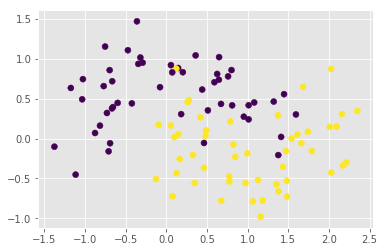

In [5]:
X, y = make_moons(noise=0.3, random_state=123)
plt.scatter(X[:,0], X[:,1], c=y)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
knn.fit(X, y)

/Users/a/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [7]:
y_hat = knn.predict(X)

In [8]:
y_hat[:10]

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [9]:
y_hat_proba = knn.predict_proba(X)
y_hat_proba.shape

(100, 2)

In [10]:
y_hat_proba[:10]

array([[0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.2, 0.8],
       [0. , 1. ],
       [0.4, 0.6]])

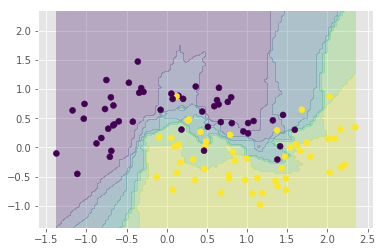

In [11]:
x_range = np.linspace(X.min(), X.max(), 100)
# ОДЗ значений признаков

xx1, xx2 = np.meshgrid(x_range, x_range)
# всевозможные попарные значения признаков

Y = knn.predict_proba(np.c_[xx1.ravel(), xx2.ravel()])[:,1]
Y = Y.reshape(xx1.shape)

plt.contourf(xx1, xx2, Y, alpha=0.3)
plt.scatter(X[:,0], X[:,1],c=y)

Проблема - никак не учитывается важность соседей в зависимости от их близости!

## Взвешенный KNN

* (классификация) вернуть наиболее частую метку класса c учетом веса
* (вероятноть) вернуть долю каждого класса с учетом весов
$$\hat{y} = \arg \max\limits_{y \in \{-1, 1\}}\sum\limits_{j=1}^k w_{(j)} [y_{(j)} == y] $$

### Варианты весов
* $w_{(j)} = \frac{k - j + 1}{k}$
* $w_{(j)} = 1/d(\tilde{x},x_{(j)})$
* $w_{(j)} = K(\frac{d(\tilde{x},x_{(j)})}{h}) $
    * $K$ - ядро, $h$ - ширина окна


### Ядра
* $K(d, h) \propto \exp(- \frac{d^2}{2h^2})$ - gaussian kernel
* $K(d, h) \propto 1 if x < d$ - tophat kernel
* $K(d, h) \propto 1 - \frac{d^2}{h^2}$ - epanechnikov kernel
* $K(d, h) \propto \exp(-d/h)$ - exponential kernel
* $K(d, h) \propto 1 - d/h if d < h$ - linear kernel
* $K(d, h) \propto \cos(\frac{\pi d}{2h}) if x < h$ - linear kernel

<center><img src='http://scikit-learn.org/stable/_images/sphx_glr_plot_kde_1d_0021.png'></center>

In [12]:
def plot_knn_class_kernel(k=1, prob=False, use_dist=False):
        
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    
    if use_dist:
        knn = KNeighborsClassifier(n_neighbors=70, metric='minkowski', p=2, weights='distance')
    else:
        knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2, weights='uniform')
    knn.fit(X, y)
    
    x_range = np.linspace(X.min(), X.max(), 500)
    # ОДЗ значений признаков

    xx1, xx2 = np.meshgrid(x_range, x_range)
    # всевозможные попарные значения признаков
    if prob:
        Y = knn.predict_proba(np.c_[xx1.ravel(), xx2.ravel()])[:,1]
    else:
        Y = knn.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Y = Y.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Y, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y)
    
    plt.show()

In [13]:
fig = interact(plot_knn_class_kernel, k=IntSlider(min=1, max=10, value=1))

interactive(children=(IntSlider(value=1, description='k', max=10, min=1), Checkbox(value=False, description='p…

# Параметры vs Гиперпараметры

При работе с моделями следует различать понятия **Параметр** и **Гипер-параметр**.

* **Параметр** - составляющая модели, которая определяется в процессе обучения (решения оптимизационной задачи)
    * Веса коэффициентов в модели линейной регрессии
* **Гиперпараметр** - составляющая модели, которая задается перед началом обучения. Может регулировать некоторые свойства модели (скорость оптимизации) или ее сложность
    * Коэффициент регуляризации в линейной регрессии
    
Как дела обстоят у kNN?


#### Гиперпараметры kNN

* Число соседей
* Функция расстояния
* Ядро, ширина окна

# Данные с оттоком клиентов

Загрузите данные об оттоке клиентов через pandas.

In [14]:
df_churn = pd.read_csv('data/churn.csv')

In [15]:
df_churn.head().T

,0,1,2,3,4
State,KS,OH,NJ,OH,OK
Account Length,128,107,137,84,75
Area Code,415,415,415,408,415
Phone,382-4657,371-7191,358-1921,375-9999,330-6626
Int'l Plan,no,no,no,yes,yes
VMail Plan,yes,yes,no,no,no
VMail Message,25,26,0,0,0
Day Mins,265.1,161.6,243.4,299.4,166.7
Day Calls,110,123,114,71,113
Day Charge,45.07,27.47,41.38,50.9,28.34


In [16]:
print(df_churn.shape)

(3333, 21)


Это небольшие данные, но у них есть большие проблемы:

#### Проблема 1: Признаки разных шкал

In [17]:
df_churn.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,3333,51,WV,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account Length,3333,NaN,NaN,NaN,101.065,39.8221,1,74,101,127,243
Area Code,3333,NaN,NaN,NaN,437.182,42.3713,408,408,415,510,510
Phone,3333,3333,419-6133,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Int'l Plan,3333,2,no,3010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VMail Plan,3333,2,no,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VMail Message,3333,NaN,NaN,NaN,8.09901,13.6884,0,0,0,20,51
Day Mins,3333,NaN,NaN,NaN,179.775,54.4674,0,143.7,179.4,216.4,350.8
Day Calls,3333,NaN,NaN,NaN,100.436,20.0691,0,87,101,114,165
Day Charge,3333,NaN,NaN,NaN,30.5623,9.25943,0,24.43,30.5,36.79,59.64


#### Проблема 2: Региональные признак
Мы можем использовать стандартную схему с OneHotEncoding:

для каждой категории создается бинарная маска-столбец, в которой стоит `1` если значение признака равно значению соответствующей категории.

Например, для признака "порт погрзки" создается бинарная макска из трех стобцов для каждого из портов: С, Q, S<br/>
Если пассажир заходил на кораблю в порту Southampton, то его признаковое описание будет соответственно: `[0, 0, 1]`


В общем виде это выглядит как-то так:
<img src='https://i.imgur.com/mtimFxh.png'>

In [18]:
df_churn.loc[:, 'State'].nunique()

51

In [19]:
df_churn.State.head()

0    KS
1    OH
2    NJ
3    OH
4    OK
Name: State, dtype: object

Можно ли его как-то неявно включить в модель?

Почитайте [тут](https://alexanderdyakonov.wordpress.com/2016/08/03/python-%D0%BA%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5-%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%B8/)

#### Проблема 3: Довольно сильный перекос классов

In [20]:
df_churn.loc[:, 'Churn?'].value_counts()

False.    2850
True.      483
Name: Churn?, dtype: int64

1. Подготовим данные
    1. Удалите ненужные признаки
    1. Преобразуйте категориальные и бинарные признаки
    1. Преобразуйте целевую переменную

In [21]:
def preproc(df_init):
    df_preproc = df_init.copy()
    
    # Удалили признаки
    df_preproc = df_preproc.drop(['State', 'Area Code', 'Phone'], axis=1)
    
    # Замена категориальных признаков
    df_preproc.loc[:,  ["Int'l Plan", 'VMail Plan']] = \
    df_preproc.loc[:,  ["Int'l Plan", 'VMail Plan']].replace({'no': 0, 'yes': 1})
    
    # Исправили переменную
    df_preproc.loc[:,  'Churn?'] = df_preproc.loc[:,  'Churn?'].replace({'False.': 0,
                                                                         'True.': 1})
    return df_preproc

In [22]:
df_preproc = df_churn.pipe(preproc)

In [23]:
df_preproc.head()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [24]:
X, y = df_preproc.iloc[:, :-1].values, df_preproc.iloc[:, -1].values

Будем использовать метод отложенной выборки

In [25]:
# Случайным образом делим на обучение и контроль
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, 
                 random_state=123)

In [26]:
# Сделаем пайплайн
# 1) Нормализатор признаков
# 2) kNN

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [28]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

In [29]:
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))])

In [30]:
y_hat = model.predict(X_test)

y_hat_proba = model.predict_proba(X_test, )

y_hat_proba.shape

(667, 2)

In [31]:
from sklearn.metrics import roc_auc_score

In [32]:
roc_auc_score(y_test, y_hat_proba[:, 1])

0.8360047846889952

Зафиксируйте все гиперпараметры, кроме количества ближайших соседей, найдите наилучшее значение
* Пока сделаем это в цикле


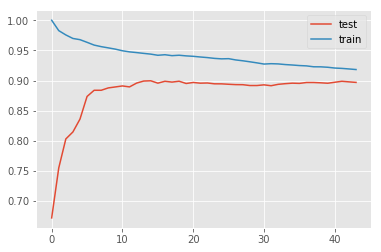

In [33]:
scores_test = []
scores_train = []

for k in range(1, 45):
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    model.fit(X_train, y_train, )
    
    y_hat_test = model.predict_proba(X_test)
    scores_test.append(roc_auc_score(y_test, y_hat_test[:, 1]))
    
    y_hat_train = model.predict_proba(X_train)
    scores_train.append(roc_auc_score(y_train, y_hat_train[:, 1]))
    
    

plt.plot(scores_test, label='test')
plt.plot(scores_train, label='train')
plt.legend()

# Дополнительная информация:


* [Data Mining and Analysis: Fundamental Concepts and Algorithms](https://repo.palkeo.com/algo/information-retrieval/Data%20mining%20and%20analysis.pdf) Ch 22 
* [Effective Pandas](https://github.com/TomAugspurger/effective-pandas)
* [Про структуры для поиска соседей](https://jakevdp.github.io/blog/2013/04/29/benchmarking-nearest-neighbor-searches-in-python/)